<a href="https://colab.research.google.com/github/HelouiseDayane/Cienciasdedados/blob/main/S%C3%A9rie_temporal_entre_2007_e_2022%2C_da_raz%C3%A3o_dos_consumidores_imobiliarios_por_estado_na_faixa_de_38_a_58_anos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coletar os dados do SIDRA usando HTTP Requests**

* No primeiro passo do processo, busquei os dados relacionados ao número de empresas nos estados do Brasil utilizando a API SIDRA do IBGE. A URL fornecida (https://apisidra.ibge.gov.br/values/t/1757/n3/all/v/410/p/2007-2020/C319/all) refere-se a uma tabela específica de empresas no Brasil, referente ao período de 2007 a 2020.


* Requisição para a API: Através da função requests.get(), enviamos uma solicitação HTTP do tipo GET para a URL da API. Essa requisição é feita para recuperar os dados necessários para nossa análise.



* Verificação do Status da Requisição: Após o envio da requisição, verificamos se a resposta foi bem-sucedida, isto é, se o código de status retornado pela API foi 200 (OK). Caso a resposta seja bem-sucedida, seguimos para o processamento dos dados. Se a requisição falhar, um erro é impresso indicando o problema.

* Conversão dos Dados: Caso a requisição seja bem-sucedida, os dados retornados pela API estão no formato JSON. Com a ajuda da biblioteca pandas, convertemos os dados para um DataFrame. Esse formato de tabela facilita o tratamento e análise dos dados, permitindo realizar operações como agregações e filtragens.


* Seleção e Renomeação das Colunas: Após converter os dados em um DataFrame, selecionamos apenas as colunas relevantes para a nossa análise: D1N (Estado), D3N (Ano) e V (Número de Empresas). Em seguida, renomeamos essas colunas para algo mais descritivo e legível, como Estado, Ano e Numero_Empresas, respectivamente.


* Conversão de Tipos de Dados: As colunas Ano e Numero_Empresas são convertidas para tipos numéricos, o que garante que possamos realizar cálculos posteriormente. Caso haja valores não numéricos ou inválidos, esses valores são tratados e convertidos de forma apropriada.


* Agrupamento dos Dados: Após o tratamento inicial, agrupamos os dados por Estado e Ano, somando o número de empresas para cada combinação de estado e ano. Isso é feito com a função groupby() do pandas, o que resulta em um DataFrame com o número total de empresas por estado para cada ano.


**O resultado final dessa etapa é uma tabela organizada com a quantidade total de empresas por estado e por ano, pronta para análise e visualização.**





In [223]:
import requests
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt


url_sidra = "https://apisidra.ibge.gov.br/values/t/1757/n3/all/v/410/p/2007-2020/C319/all"

response = requests.get(url_sidra)

if response.status_code == 200:
    data_sidra = response.json()

    # Converção para DataFrame e Ignorar o cabeçalho (primeiro item)
    df_sidra = pd.DataFrame(data_sidra[1:])

    df_sidra = df_sidra[['D1N', 'D3N', 'V']]
    df_sidra.columns = ['Estado', 'Ano', 'Numero_Empresas']

    # Converter colunas para o tipo correto, tratando erros
    df_sidra['Ano'] = pd.to_numeric(df_sidra['Ano'], errors='coerce')
    df_sidra['Numero_Empresas'] = pd.to_numeric(df_sidra['Numero_Empresas'], errors='coerce')

    df_agrupado = df_sidra.groupby(['Estado', 'Ano']).agg({'Numero_Empresas': 'sum'}).reset_index()

    # Vizualização dos dados iniciais para facilitar e ter certeza queo código filtrou e agrupou como desejado
    print(df_agrupado)
else:
    print("Erro ao buscar dados:", response.status_code, response.text)


        Estado   Ano  Numero_Empresas
0         Acre  2007             89.0
1         Acre  2008            113.0
2         Acre  2009            131.0
3         Acre  2010            149.0
4         Acre  2011            181.0
..         ...   ...              ...
373  Tocantins  2016            287.0
374  Tocantins  2017            262.0
375  Tocantins  2018            278.0
376  Tocantins  2019            230.0
377  Tocantins  2020            284.0

[378 rows x 3 columns]


# **Processamento dos Dados de População por Idade e Local**


* Carregamento do Arquivo Excel:
Utilizei a função pd.read_excel() para carregar o arquivo Excel (projecoes_2024_tab1_idade_simples.xlsx) em um DataFrame chamado data_populacao. Como o arquivo contém cabeçalhos misturados com dados, carreguei o arquivo inicialmente sem cabeçalhos (header=None) para processar manualmente.

- Ajuste dos Cabeçalhos:
Extraí os cabeçalhos corretos da quinta linha do arquivo (índice 5). Essa linha contém os nomes das colunas, mas ajustei alguns deles manualmente.

* Conversão e Filtragem de Idades:
Convertendo os valores da coluna IDADE para numéricos (pd.to_numeric), garanti que idades inválidas ou ausentes sejam tratadas como NaN.
Filtrei os dados para considerar apenas a faixa etária 38 a 58 anos. Essa faixa foi escolhida com base no critério da análise.
* Agrupamento por Estado:
Para cada estado (indicado pela coluna LOCAL), somei os valores populacionais das idades dentro da faixa etária para cada ano (2007 a 2020). Esse agrupamento foi realizado utilizando o método groupby() do pandas.

* Renomeação das Colunas:
Após o agrupamento, renomeei as colunas para refletir os dados organizados. A coluna LOCAL foi renomeada para Estado, enquanto as colunas dos anos foram mantidas como os respectivos anos (2007 a 2020).

* Remoção da Linha "Brasil":
Como a linha referente a Brasil representa o total nacional e não faz parte da análise por estado, essa linha foi excluída do DataFrame. Isso deixa apenas os dados individuais de cada estado.

In [316]:
file_path = "/content/projecoes_2024_tab1_idade_simples.xlsx"

data_populacao = pd.read_excel(file_path, header=None)

headers = list(data_populacao.iloc[5])
headers[0] = 'IDADE'
headers[1] = 'SEXO'
headers[4] = 'LOCAL'

for col_index, year in enumerate(range(2007, 2021), start=12):
    headers[col_index] = year

data_populacao.columns = headers
data_populacao = data_populacao.iloc[6:].reset_index(drop=True)

anos = list(range(2007, 2021))
data_populacao = data_populacao[['IDADE', 'LOCAL'] + anos]

data_populacao['IDADE'] = pd.to_numeric(data_populacao['IDADE'], errors='coerce')
data_populacao = data_populacao[(data_populacao['IDADE'] >= 38) & (data_populacao['IDADE'] <= 58)]

data_populacao = data_populacao.groupby('LOCAL')[anos].sum().reset_index()

data_populacao.columns = ['Estado'] + anos

regioes_a_excluir = ['Brasil', 'Norte', 'Nordeste', 'Sul', 'Sudeste', 'Centro-Oeste']
data_populacao = data_populacao[~data_populacao['Estado'].isin(regioes_a_excluir)]

print(data_populacao)


                 Estado        2007        2008        2009        2010  \
0                  Acre    237872.0    248078.0    258494.0    268966.0   
1               Alagoas   1231534.0   1263800.0   1295762.0   1327082.0   
2                 Amapá    204620.0    215802.0    227100.0    238278.0   
3              Amazonas   1149328.0   1196066.0   1243864.0   1292676.0   
4                 Bahia   5944794.0   6089626.0   6236104.0   6383498.0   
6                 Ceará   3499184.0   3589098.0   3678990.0   3768170.0   
8      Distrito Federal   1127426.0   1166938.0   1206532.0   1246256.0   
9        Espírito Santo   1727586.0   1773042.0   1816426.0   1857138.0   
10                Goiás   2747140.0   2842716.0   2938560.0   3032770.0   
11             Maranhão   2323962.0   2384246.0   2444448.0   2503650.0   
12          Mato Grosso   1318834.0   1364608.0   1409994.0   1454742.0   
13   Mato Grosso do Sul   1125414.0   1156814.0   1187058.0   1215788.0   
14         Minas Gerais  

## **União dos Dados de Empresas e População**
Nessa etapa, uni os dados processados de empresas (df_agrupado) e de população por faixa etária (data_populacao) para criar um único DataFrame consolidado (df_unido). Esse passo é essencial para correlacionar o número de empresas e a população de cada estado ao longo dos anos.

In [317]:
df_agrupado['Estado'] = df_agrupado['Estado'].astype(str)
data_populacao['Estado'] = data_populacao['Estado'].astype(str)

# Resetar os índices novamente, caso necessário
df_agrupado.reset_index(drop=True, inplace=True)
data_populacao.reset_index(drop=True, inplace=True)

# Unir os DataFrames
df_unido = pd.merge(df_agrupado, data_populacao, on='Estado', how='inner', suffixes=('_Empresas', '_Populacao'))

print(df_unido)


        Estado   Ano  Numero_Empresas      2007      2008      2009      2010  \
0         Acre  2007             89.0  237872.0  248078.0  258494.0  268966.0   
1         Acre  2008            113.0  237872.0  248078.0  258494.0  268966.0   
2         Acre  2009            131.0  237872.0  248078.0  258494.0  268966.0   
3         Acre  2010            149.0  237872.0  248078.0  258494.0  268966.0   
4         Acre  2011            181.0  237872.0  248078.0  258494.0  268966.0   
..         ...   ...              ...       ...       ...       ...       ...   
373  Tocantins  2016            287.0  530722.0  548408.0  566212.0  583876.0   
374  Tocantins  2017            262.0  530722.0  548408.0  566212.0  583876.0   
375  Tocantins  2018            278.0  530722.0  548408.0  566212.0  583876.0   
376  Tocantins  2019            230.0  530722.0  548408.0  566212.0  583876.0   
377  Tocantins  2020            284.0  530722.0  548408.0  566212.0  583876.0   

         2011      2012    

# **Interpolação, Cálculo de Razões e Identificação de Saturação e Oportunidades**
Nesta etapa, apliquei técnicas de interpolação e cálculo de indicadores para aprofundar a análise dos dados consolidados. O objetivo é prever o comportamento futuro do número de empresas, avaliar a relação entre empresas e população, e identificar estados com mercados saturados ou oportunidades de crescimento.

1. Previsão para os Anos de 2021 e 2022 Usando Interpolação Cúbica (Spline)

Processo de interpolação:

Para cada estado no DataFrame, extraí os anos disponíveis (x) e o número de empresas correspondentes (y_empresas).
Usei a função CubicSpline do Scipy para criar uma curva que ajusta os valores históricos.
Estimei os valores de 2021 e 2022 aplicando a curva aos anos correspondentes e armazenamos os resultados nas colunas respectivas do DataFrame.
2. Cálculo da Razão Empresas/População para Cada Ano:
Por que calcular a razão?
A razão entre o número de empresas e a população (na faixa etária de 38 a 58 anos) é um indicador importante para entender a densidade empresarial em relação ao mercado consumidor em potencial.

Cálculo:

Para cada ano de 2008 a 2022, a razão é calculada dividindo o número de empresas (Numero_Empresas) pela população do estado naquele ano.
Os resultados são armazenados em novas colunas, nomeadas como Relacao_<Ano> (por exemplo, Relacao_2022).
3. Cálculo da Variação da Razão Entre 2020 e 2022:
Por que calcular a variação?
A diferença na razão Empresas/População entre 2020 e 2022 (Var_2020_2022) indica mudanças no mercado em um curto período. Estados com alta variação positiva podem ter oportunidades de expansão, enquanto aqueles com variação negativa podem estar saturados.

Cálculo:

A variação é obtida subtraindo a razão de 2020 (Relacao_2020) da razão de 2022 (Relacao_2022).
O resultado é armazenado na nova coluna Var_2020_2022.
4. Identificação de Estados Saturados e Oportunidades:
Estados Saturados:

Ordenei os estados de acordo com a razão Empresas/População em 2022 (Relacao_2022) de forma decrescente. Estados no topo dessa lista possuem mercados mais saturados, com um alto número de empresas em relação à população.
Estados com Oportunidades:

Ordenei os estados pela variação positiva (Var_2020_2022) de forma decrescente. Estados no topo dessa lista mostram maior crescimento ou oportunidades de expansão empresarial entre 2020 e 2022.


In [318]:
for estado in df_unido['Estado']:
    x = list(range(2007, 2021))
    y_empresas = df_unido[df_unido['Estado'] == estado][x].values[0]

    spline = interpolate.CubicSpline(x, y_empresas)
    df_unido.loc[df_unido['Estado'] == estado, 2021] = spline(2021)
    df_unido.loc[df_unido['Estado'] == estado, 2022] = spline(2022)

In [319]:
for ano in range(2008, 2023):
    df_unido[f'Relacao_{ano}'] = df_unido['Numero_Empresas'] / df_unido[ano]

df_unido['Var_2021_2022'] = abs(df_unido['Relacao_2022'] - df_unido['Relacao_2021'])

print(df_unido.head())

estados_saturados = df_unido.sort_values(by='Relacao_2022', ascending=False)
estados_oportunidade = df_unido.sort_values(by='Var_2021_2022', ascending=False)


  Estado   Ano  Numero_Empresas      2007      2008      2009      2010  \
0   Acre  2007             89.0  237872.0  248078.0  258494.0  268966.0   
1   Acre  2008            113.0  237872.0  248078.0  258494.0  268966.0   
2   Acre  2009            131.0  237872.0  248078.0  258494.0  268966.0   
3   Acre  2010            149.0  237872.0  248078.0  258494.0  268966.0   
4   Acre  2011            181.0  237872.0  248078.0  258494.0  268966.0   

       2011      2012      2013  ...  Relacao_2014  Relacao_2015  \
0  279478.0  290150.0  301078.0  ...      0.000285      0.000275   
1  279478.0  290150.0  301078.0  ...      0.000362      0.000349   
2  279478.0  290150.0  301078.0  ...      0.000419      0.000404   
3  279478.0  290150.0  301078.0  ...      0.000477      0.000460   
4  279478.0  290150.0  301078.0  ...      0.000579      0.000559   

   Relacao_2016  Relacao_2017  Relacao_2018  Relacao_2019  Relacao_2020  \
0      0.000265      0.000256      0.000247      0.000240      0.

# **Abaixo apenas fiz um gráfico para que fique visivelmente claro os resultados que encontrei.**

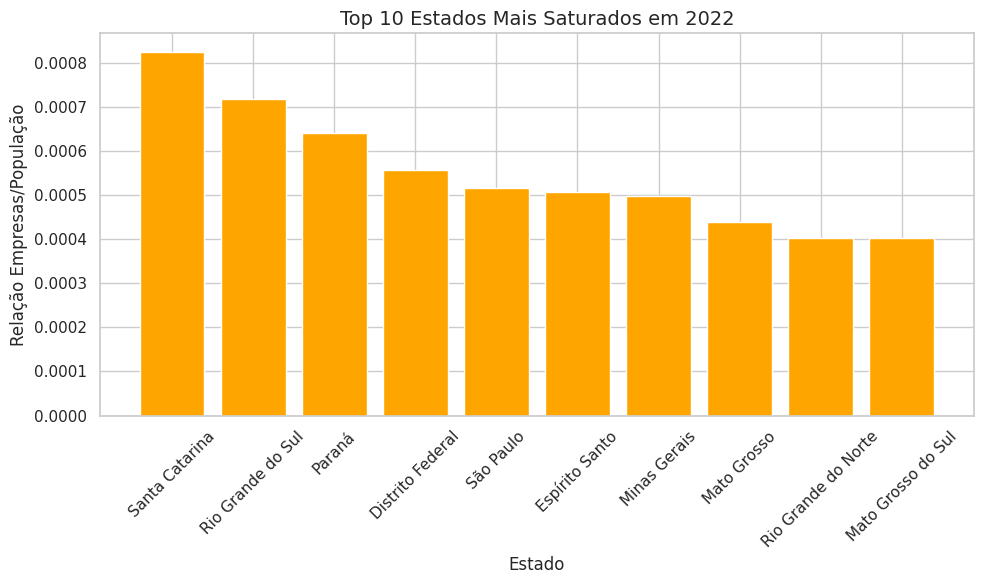

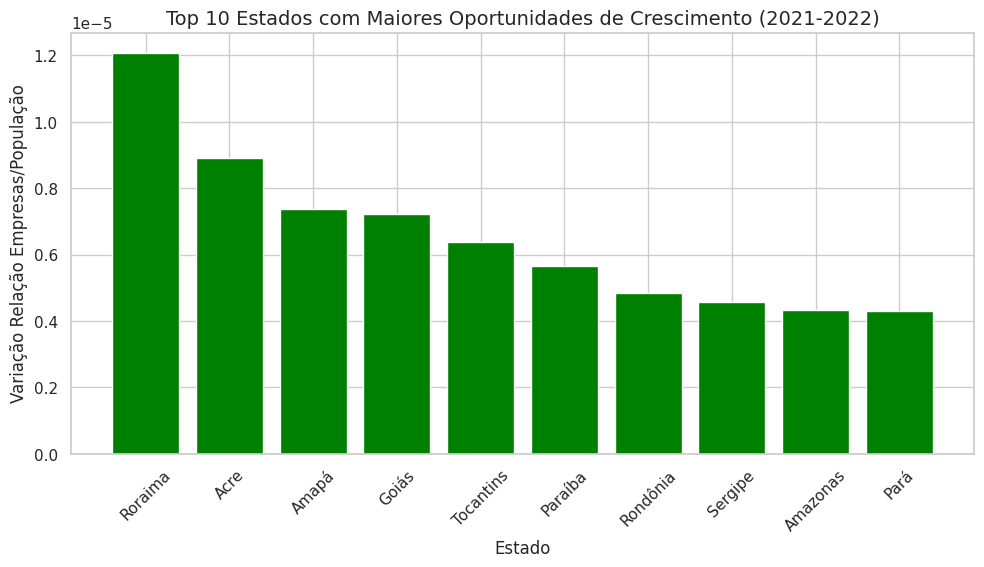

In [320]:
import matplotlib.pyplot as plt


df_agrupado_por_estado = df_unido.groupby('Estado').agg({
    'Relacao_2022': 'mean',
    'Var_2021_2022': 'mean'
}).reset_index()

top_saturados = df_agrupado_por_estado.sort_values(by='Relacao_2022', ascending=False).head(10)


top_oportunidades = df_agrupado_por_estado[~df_agrupado_por_estado['Estado'].isin(top_saturados['Estado'])].sort_values(by='Var_2021_2022', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_saturados['Estado'], top_saturados['Relacao_2022'], color='orange')
plt.title('Top 10 Estados Mais Saturados em 2022', fontsize=14)
plt.ylabel('Relação Empresas/População', fontsize=12)
plt.xlabel('Estado', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(top_oportunidades['Estado'], top_oportunidades['Var_2021_2022'], color='green')
plt.title('Top 10 Estados com Maiores Oportunidades de Crescimento (2021-2022)', fontsize=14)
plt.ylabel('Variação Relação Empresas/População', fontsize=12)
plt.xlabel('Estado', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
